In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [0]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(32)
tf.random.set_seed(32)

In [12]:
X_train.shape

(11610, 8)

In [0]:
model = keras.models.Sequential([
                                keras.layers.Dense(30, activation= "relu", input_shape=[8]),
                                keras.layers.Dense(30, activation= "relu"),
                                keras.layers.Dense(1)
])

In [0]:
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [22]:
model_history = model.fit(X_train,y_train,epochs=20,
                          validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3872 - mae: 0.4435 - val_loss: 0.3601 - val_mae: 0.4272
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3842 - mae: 0.4422 - val_loss: 0.4471 - val_mae: 0.4339
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3833 - mae: 0.4415 - val_loss: 0.3608 - val_mae: 0.4269
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3810 - mae: 0.4404 - val_loss: 0.3552 - val_mae: 0.4233
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3787 - mae: 0.4388 - val_loss: 0.3576 - val_mae: 0.4241
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3770 - mae: 0.4378 - val_loss: 0.3759 - val_mae: 0.4270
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3759 - mae: 0.4375 - val_loss: 0.3583 - val_mae: 0.4210
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [23]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3582 - mae: 0.4222


In [24]:
model_history.history

{'loss': [0.3871939182281494,
  0.3842352032661438,
  0.38326337933540344,
  0.38097289204597473,
  0.3787151873111725,
  0.3769945502281189,
  0.37593168020248413,
  0.37388187646865845,
  0.3728957772254944,
  0.3720382750034332,
  0.3704846501350403,
  0.36919066309928894,
  0.3687005937099457,
  0.36732783913612366,
  0.36624088883399963,
  0.3653586208820343,
  0.3648591935634613,
  0.36405149102211,
  0.36321455240249634,
  0.3618339002132416],
 'mae': [0.4434793293476105,
  0.4422095715999603,
  0.44147157669067383,
  0.44043511152267456,
  0.4388093948364258,
  0.43775272369384766,
  0.4374983608722687,
  0.43557778000831604,
  0.43551990389823914,
  0.43445393443107605,
  0.4335545003414154,
  0.432735800743103,
  0.4328337013721466,
  0.43210285902023315,
  0.430829256772995,
  0.43025779724121094,
  0.4301880896091461,
  0.4291030466556549,
  0.4292386770248413,
  0.42805448174476624],
 'val_loss': [0.36013129353523254,
  0.4470835030078888,
  0.36082199215888977,
  0.355229

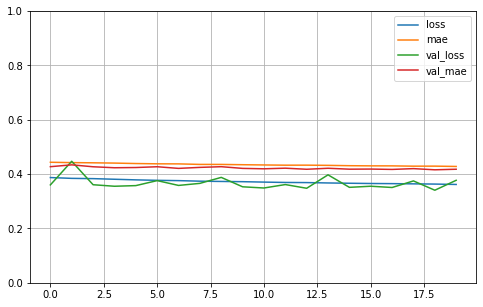

In [25]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()